<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##What is Linear Regression
 A data analysis technique that predicts the value of unknown data by using another related and known data value

Its goal is to model the relationship btwn a dependent variable (target) and one or more independent variables (features) by fitting straight lines to the data

Equation of a Line: The model represents the relationship as:


y=β
0
​
 +β
1
​
 x
1
​
 +β
2
​
 x
2
​
 +⋯+β
n
​
 x
n
​
 +ϵ

 Where

 y -> Target variable (output/prediction)

 x1,x3...xn -> input features

 β
0
​
 : Intercept (value of
𝑦
y when all
𝑥
𝑖
=
0
x
i
​
 =0)

 β
1
​
 ,β
2
​
 ,…,β
n
​
 : Coefficients (slopes of the line w.r.t. each feature)

 ϵ: Error term (difference between actual and predicted values)

#Types of LR
##1. Simple LR
 - One independent variable / feature
 - Equation:  
𝑦
=
𝛽
0
+
𝛽
1
𝑥
+
𝜖


##2. Multiple LR

-  Multiple independent variables
- Equation: y=β 0 +β1 x1 +β2 x2 +⋯+βn x n +ϵ.

#Problem statement
You are tasked with predicting the monthly rent of apartments based on their size (in square feet). A dataset containing information about previous apartments and their rents is available.

In [ ]:
import pandas as pd

# Creating the dataset
data = {
    "House Size": [500, 800, 1000, 1500, 1800, 2000, 2500, 3000, 3500, 4000],
    "Price": [2000000, 3000000, 4000000, 6000000, 7200000, 8000000, 10000000, 12000000, 14000000, 16000000]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Viewing the DataFrame
print(df)

   House Size     Price
0         500   2000000
1         800   3000000
2        1000   4000000
3        1500   6000000
4        1800   7200000
5        2000   8000000
6        2500  10000000
7        3000  12000000
8        3500  14000000
9        4000  16000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[["House Size"]] #feature / input
Y = df["Price"] #target / need to predict

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
x_test

,House Size
8,3500
1,800


In [ ]:
# Step 4: Train the Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Step 5: Make Predictions
y_train_pred = model.predict(x_train)  # Predictions on training data
y_test_pred = model.predict(x_test)    # Predictions on test data

In [ ]:
df

,House Size,Price
0,500,2000000
1,800,3000000
2,1000,4000000
3,1500,6000000
4,1800,7200000
5,2000,8000000
6,2500,10000000
7,3000,12000000
8,3500,14000000
9,4000,16000000


In [ ]:
x_train

,House Size
5,2000
0,500
7,3000
2,1000
9,4000
4,1800
3,1500
6,2500


In [ ]:
y_train_pred

array([ 8000000.,  2000000., 12000000.,  4000000., 16000000.,  7200000.,
        6000000., 10000000.])

In [ ]:
y_test_pred

array([14000000.,  3200000.])

In [ ]:
x_test

,House Size
8,3500
1,800


In [ ]:
model.predict([[7]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28000.])

In [ ]:
# Step 6: Evaluate the Model
# Training set evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [ ]:
# Test set evaluation
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
# Display Results
print("Model Coefficients:")
print(f"Intercept (β₀): {model.intercept_}")
print(f"Coefficient (β₁): {model.coef_[0]}")
print("\nEvaluation Metrics (Training Set):")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R-squared (R²): {r2_train}")
print("\nEvaluation Metrics (Test Set):")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared (R²): {r2_test}")

Model Coefficients:
Intercept (β₀): -9.313225746154785e-10
Coefficient (β₁): 4000.0000000000005

Evaluation Metrics (Training Set):
Mean Squared Error (MSE): 8.809142651444724e-20
R-squared (R²): 1.0

Evaluation Metrics (Test Set):
Mean Squared Error (MSE): 19999999999.99991
R-squared (R²): 0.9993388429752066


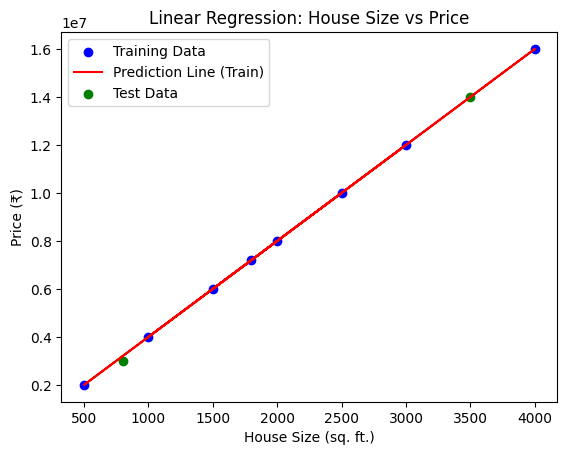

In [ ]:
# Step 7: Visualize Results
# Plot training data
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, y_train_pred, color='red', label='Prediction Line (Train)')

# Plot test data
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.xlabel("House Size (sq. ft.)")
plt.ylabel("Price (₹)")
plt.title("Linear Regression: House Size vs Price")
plt.legend()
plt.show()